# 小麦とチェス盤問題

サンプルコード

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [2]:
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数

In [3]:
square_size = (2,2)
a_ndarray = small_board_ndarray.reshape(square_size)
print(a_ndarray)

[[1 2]
 [4 8]]


## 【問題2】n×mマスへの拡張

In [4]:
def chessboard_wheat(square_size=(8,8)):
    
     """
     Parameteres
     -------------
     square_size:int
        マスの大きさ　(デフォルト:8,8)
             
     Returns
     -------------
       a_ndarray : ndarry,reshape(square_size)
             チェス盤上の小麦の配列
      """
     border_list = [1]
     aria = square_size[0]*square_size[1]
     for _ in range(aria - 1):
        border_list.append(2*border_list[-1])
        
     a_ndarray = np.array(border_list).reshape(square_size)
     return a_ndarray

square_size = 8,8
print(chessboard_wheat(square_size))
    

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

## 【問題3】小麦の数の合計

In [5]:
square_size = (8,8)
b_ndarray = chessboard_wheat(square_size)

total_wheat = b_ndarray.sum()
mean_wheat = b_ndarray.mean(axis=0)

print("{}マスの小麦の合計は{}です".format(square_size,total_wheat))

(8, 8)マスの小麦の合計は1.8446744073709552e+19です


## 【問題4】小麦の数のヒートマップ

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

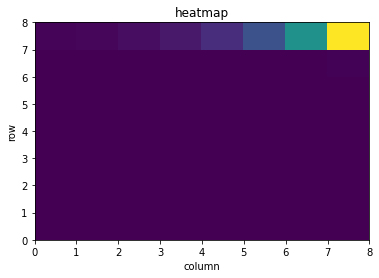

In [7]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(b_ndarray.reshape(square_size))
plt.show()

## 【問題5】後半は前半の何倍か

In [8]:
first_half = b_ndarray[:4,:].sum()
latter_half = b_ndarray[4:,:].sum()

ratio = latter_half/first_half 

print("後半は前半の{}倍となっている".format(ratio))

後半は前半の4294967296.0倍となっている


## 【問題6】他の計算方法によるn×mマスへの拡張

〈np.append()による計算〉

In [14]:
def chessboard_wheat_append(square_size=(8,8)):
    """
    """
    n_squares = square_size[0]*square_size[1]
    c_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(n_squares - 1):
         c_ndarray =  np.append( c_ndarray,2* c_ndarray[-1])
         
    c_ndarray = c_ndarray.reshape(square_size)
    return c_ndarray

square_size = (8,8)
d_nbarray = chessboard_wheat_append(square_size)
total_wheat = d_nbarray.sum()

print("{}マスの小麦の合計は{}です".format(square_size,total_wheat))

(8, 8)マスの小麦の合計は1.8446744073709552e+19です


<ブロードキャストによる計算>

In [15]:
def chessboard_wheat_broadcast(square_size=(8,8)):
    
     n_squares = square_size[0]*square_size[1]
     b_squares = np.arange(n_squares ).astype(np.uint64)
     d_ndarray = 2**b_squares
     d_ndarray = d_ndarray.reshape(square_size)
     return d_ndarray


square_size = (8,8)
d_ndarray= chessboard_wheat_broadcast(square_size)
total_wheat = d_ndarray.sum()

print("{}マスの小麦の合計は{}です".format(square_size,total_wheat))

    

(8, 8)マスの小麦の合計は18446744073709551615です


##  【問題7】計算時間の比較

In [23]:
%%timeit # リストのappend計算
ndarray = chessboard_wheat(square_size)

19.9 µs ± 951 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%%timeit # npappend計算
ndarray = chessboard_wheat_append(square_size=(8,8))

458 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
 %%timeit # ブロードキャスト計算
ndarray = chessboard_wheat_broadcast(square_size=(8,8))

3.69 µs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
